In [1]:
import os
import fiona
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

PROJ: proj_create_from_database: Cannot find proj.db


In [2]:
c = fiona.open('NODELINKDATA-2020-03-31/MOCT_LINK.shp', encoding='euc-kr')
link_gdf = gpd.GeoDataFrame.from_features(c, crs=c.crs).to_crs('epsg:4326')
c = fiona.open('NODELINKDATA-2020-03-31/MOCT_NODE.shp', encoding='euc-kr')
node_gdf = gpd.GeoDataFrame.from_features(c, crs=c.crs).to_crs('epsg:4326')

In [3]:
link_gdf.head(5)

,geometry,LINK_ID,F_NODE,T_NODE,LANES,ROAD_RANK,ROAD_TYPE,ROAD_NO,ROAD_NAME,ROAD_USE,MULTI_LINK,CONNECT,MAX_SPD,REST_VEH,REST_W,REST_H,LENGTH,REMARK
0,"LINESTRING (129.02586 35.31632, 129.02604 35.3...",3880778900,3880289100,3880289500,1,107,000,-,금오14길,0,0,000,40,0,0,0,134.2642,None
1,"LINESTRING (129.02604 35.31752, 129.02611 35.3...",3880779000,3880289500,3880289000,1,107,000,-,금오14길,0,0,000,40,0,0,0,40.1724,None
2,"LINESTRING (129.02598 35.31789, 129.02591 35.3...",3880779100,3880289000,3880289500,1,107,000,-,금오14길,0,0,000,40,0,0,0,40.1723,None
3,"LINESTRING (129.02661 35.31753, 129.02598 35.3...",3880779200,3880289600,3880289500,1,107,000,-,금오14길,0,0,000,40,0,0,0,57.1228,None
4,"LINESTRING (129.02597 35.31747, 129.02660 35.3...",3880779300,3880289500,3880289600,1,107,000,-,금오14길,0,0,000,40,0,0,0,57.1228,None


In [4]:
mdf = pd.read_excel('서울시 표준링크 매핑정보_2020년3월 기준.xlsx')

In [5]:
adf_list = []
for fname in sorted(os.listdir('csv')):
    adf_list.append(pd.read_csv('csv/'+fname))
adf = pd.concat(adf_list)

In [6]:
adf.head(5)

,일자,요일,도로명,링크아이디,시점명,종점명,거리,방향,01시,02시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,20140101,수,4.19로,1080012200,통일연수원,4.19탑,1179,상행,42.77,45.01,...,37.88,38.75,39.00,48.25,54.50,64.00,68.00,67.00,58.17,44.00
1,20140101,수,4.19로,1080012800,4.19탑,국립4.19묘지입구,352,상행,19.36,21.18,...,13.01,12.61,10.95,13.91,14.27,18.44,17.01,15.87,18.08,15.52
2,20140101,수,4.19로,1080012700,국립4.19묘지입구,4.19탑,354,하행,29.08,31.83,...,22.51,21.07,18.03,21.44,20.63,23.13,20.37,30.03,23.08,26.78
3,20140101,수,4.19로,1080012100,4.19탑,통일연수원,1190,하행,44.33,37.25,...,29.91,23.25,23.67,23.00,24.05,27.25,35.00,41.50,38.42,25.75
4,20140101,수,가락로,1230024700,방이초교,백제고분군,844,상행,24.22,23.65,...,18.63,20.87,22.08,23.78,18.95,18.70,21.07,18.92,18.73,22.75


In [7]:
for m in adf.columns:
    print(m, adf[m].dtype)

일자 int64
요일 object
도로명 object
링크아이디 int64
시점명 object
종점명 object
거리 int64
방향 object
01시 float64
02시 float64
03시 float64
04시 float64
05시 float64
06시 float64
07시 float64
08시 float64
09시 float64
10시 float64
11시 float64
12시 float64
13시 float64
14시 float64
15시 float64
16시 float64
17시 float64
18시 float64
19시 float64
20시 float64
21시 float64
22시 float64
23시 float64
24시 float64


In [8]:
tdf = mdf[mdf['서비스링크'].isin(adf['링크아이디'].unique())]

In [9]:
from cartoframes.viz import Layer, popup_element
Layer(
    link_gdf[link_gdf['LINK_ID'].astype(np.int64).isin(tdf['표준링크아이디'])],
    popup_click=[
        popup_element('LINK_ID'),
    ]
)

In [10]:
dcols = adf.columns[8:]

Note: NumExpr detected 24 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


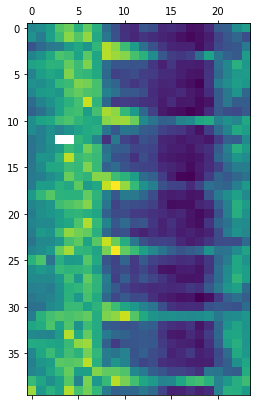

In [11]:
plt.matshow(adf[adf['링크아이디'] == 1010014100][dcols].values[-40:])
plt.show()